<a href="https://colab.research.google.com/github/skodan/MLJ-CP-MMR-CaptioningSystem/blob/main/clip_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q transformers ftfy regex tqdm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.7 MB/s eta 0:00:00


In [2]:
from PIL import Image, ImageOps, ImageFilter, Image
import numpy as np
import torch
from transformers import CLIPProcessor, CLIPModel
import os

In [15]:
# add image path
image_path = "/content/Dog_Image.png"

queries = [
    "a golden retriever dog sitting in a field",
    "a cute cat sleeping on a couch",
    "a red sports car on a highway"
]

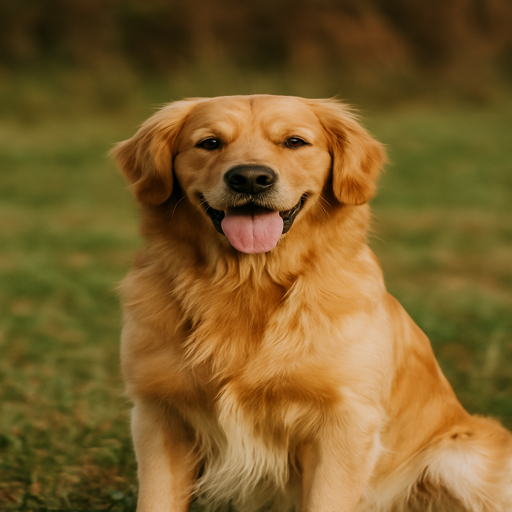

In [16]:
# load image
image = Image.open(image_path).convert("RGB")
display(image.resize((512,512)))


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device: ",device)

Device:  cuda


In [17]:
# Load CLIP
model_id = "openai/clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_id).to("cpu")
processor = CLIPProcessor.from_pretrained(model_id)

In [18]:
inputs = processor(text=queries, images=image, return_tensors="pt", padding=True)
with torch.no_grad():
  image_features = model.get_image_features(pixel_values=inputs['pixel_values'])
  text_features = model.get_text_features(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'])

In [19]:
image_vec = image_features[0].numpy()
image_vec /= np.linalg.norm(image_vec)
text_vecs = text_features.numpy()
text_vecs = text_vecs / np.linalg.norm(text_vecs, axis=1, keepdims=True)

In [20]:
sims = (text_vecs @ image_vec).tolist()  # dot product of normalized vectors = cosine similarity
for q, s in zip(queries, sims):
    print(f"{s:.4f}\t{q}")

best_idx = int(np.argmax(sims))
print("\nBest match:", queries[best_idx], "score:", sims[best_idx])

0.3144	a golden retriever dog sitting in a field
0.1452	a cute cat sleeping on a couch
0.1573	a red sports car on a highway

Best match: a golden retriever dog sitting in a field score: 0.31443750858306885
